In [77]:
import pandas as pd
from pathlib import Path
import numpy as np 
import seaborn as sns
sns.set()
import statsmodels.api as sm
%pylab inline
import matplotlib.pyplot as plt


Populating the interactive namespace from numpy and matplotlib


 # Regression Exploration

The funciton I created to store regression results is as follows:

In [23]:
def run_a_regression_on(X, Y):
    
    #creating space to save regressions
    
    foldername = input('Create a name for this regression: ')
    Path('regressions/' + foldername).mkdir(parents = True, exist_ok = True )
    
    #actual regression
    
    X = sm.add_constant(X)
    model = sm.OLS(Y,X).fit()
    
    #saving regression summary
    #this is from stackoverflow
    
    plt.rc('figure', figsize=(12, 7))
    plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('regressions/' + foldername + '/summary.png') 
    
    #saving regression plot
    
    fig = plt.figure(figsize=(12, 12))
    sm.graphics.plot_partregress_grid(model, fig=fig)
    plt.savefig('regressions/' + foldername + '/graph.png')
    
    print('Congratulations! The regression results are saved!')
    
    return

## Load the data
I will be using a dataset created by aggregating the CPUC local government claims by county. 

In [78]:
local_gov = pd.read_csv('data/better_cpuc_compiled.csv')

In [79]:
local_gov.head()

,Unnamed: 0,County,Population,Mean Income,CES Score Median,TotalFirstYearGrosskWh,TotalFirstYearGrossTherm,Budget,Total Claims,Total Programs,IRR,Tax Revenue (2016-2018)
0,0,Alameda,1656754,76626,21.532906,0.0,0.0,0.0,0.0,0.0,0.270123,2.881751e+09
1,1,Alpine,1039,78945,11.343357,0.0,0.0,0.0,0.0,0.0,0.656045,1.880989e+07
2,2,Amador,38429,51453,23.257549,0.0,0.0,0.0,0.0,0.0,0.502563,7.272484e+07
3,3,Butte,225817,62405,20.033261,0.0,0.0,0.0,0.0,0.0,0.434555,3.993513e+08
4,4,Calaveras,45514,70651,15.180852,0.0,0.0,0.0,0.0,0.0,0.509595,1.008354e+08


In [80]:
local_gov.drop(columns='Unnamed: 0', inplace=True)

In [81]:
local_gov.head()

,County,Population,Mean Income,CES Score Median,TotalFirstYearGrosskWh,TotalFirstYearGrossTherm,Budget,Total Claims,Total Programs,IRR,Tax Revenue (2016-2018)
0,Alameda,1656754,76626,21.532906,0.0,0.0,0.0,0.0,0.0,0.270123,2.881751e+09
1,Alpine,1039,78945,11.343357,0.0,0.0,0.0,0.0,0.0,0.656045,1.880989e+07
2,Amador,38429,51453,23.257549,0.0,0.0,0.0,0.0,0.0,0.502563,7.272484e+07
3,Butte,225817,62405,20.033261,0.0,0.0,0.0,0.0,0.0,0.434555,3.993513e+08
4,Calaveras,45514,70651,15.180852,0.0,0.0,0.0,0.0,0.0,0.509595,1.008354e+08


In [82]:
local_gov.dtypes

County                       object
Population                    int64
Mean Income                   int64
CES Score Median            float64
TotalFirstYearGrosskWh      float64
TotalFirstYearGrossTherm    float64
Budget                      float64
Total Claims                float64
Total Programs              float64
IRR                         float64
Tax Revenue (2016-2018)     float64
dtype: object

In [83]:
df = local_gov.copy()

,County,Population,Mean Income,CES Score Median,TotalFirstYearGrosskWh,TotalFirstYearGrossTherm,Budget,Total Claims,Total Programs,IRR,Tax Revenue (2016-2018)
0,Alameda,1656754,76626,21.532906,0.0,0.0,0.0,0.0,0.0,0.270123,2.881751e+09
1,Alpine,1039,78945,11.343357,0.0,0.0,0.0,0.0,0.0,0.656045,1.880989e+07
2,Amador,38429,51453,23.257549,0.0,0.0,0.0,0.0,0.0,0.502563,7.272484e+07
3,Butte,225817,62405,20.033261,0.0,0.0,0.0,0.0,0.0,0.434555,3.993513e+08
4,Calaveras,45514,70651,15.180852,0.0,0.0,0.0,0.0,0.0,0.509595,1.008354e+08


# CES and Population

Budget

Create a name for this regression:  CES, Population, Budget preliminary


Congratulations! The regression results are saved!


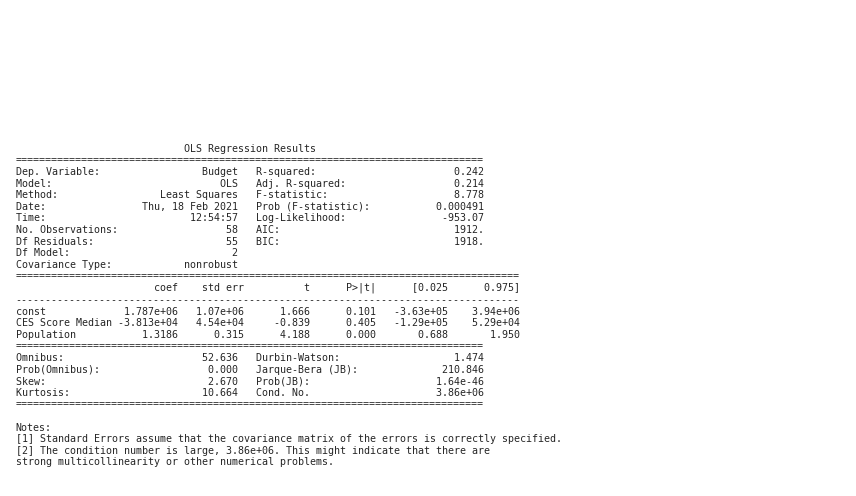

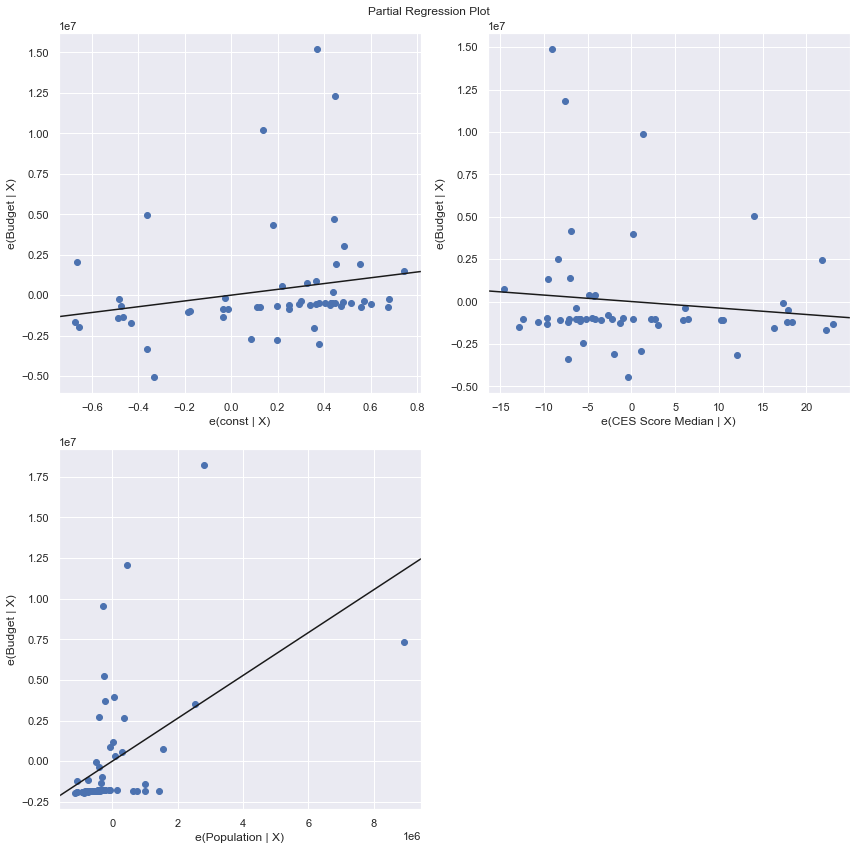

In [24]:
run_a_regression_on(df[['CES Score Median', 'Population']], df['Budget'])

kWh

Create a name for this regression:  CES, Population, kWh preliminary


Congratulations! The regression results are saved!


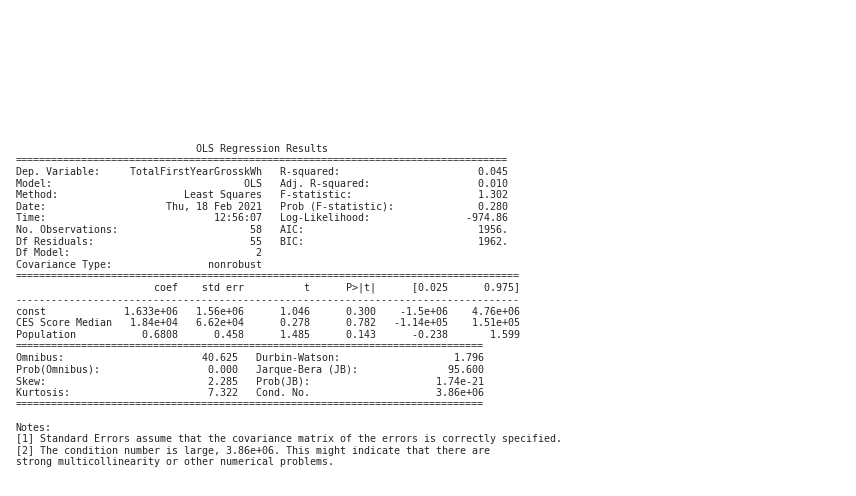

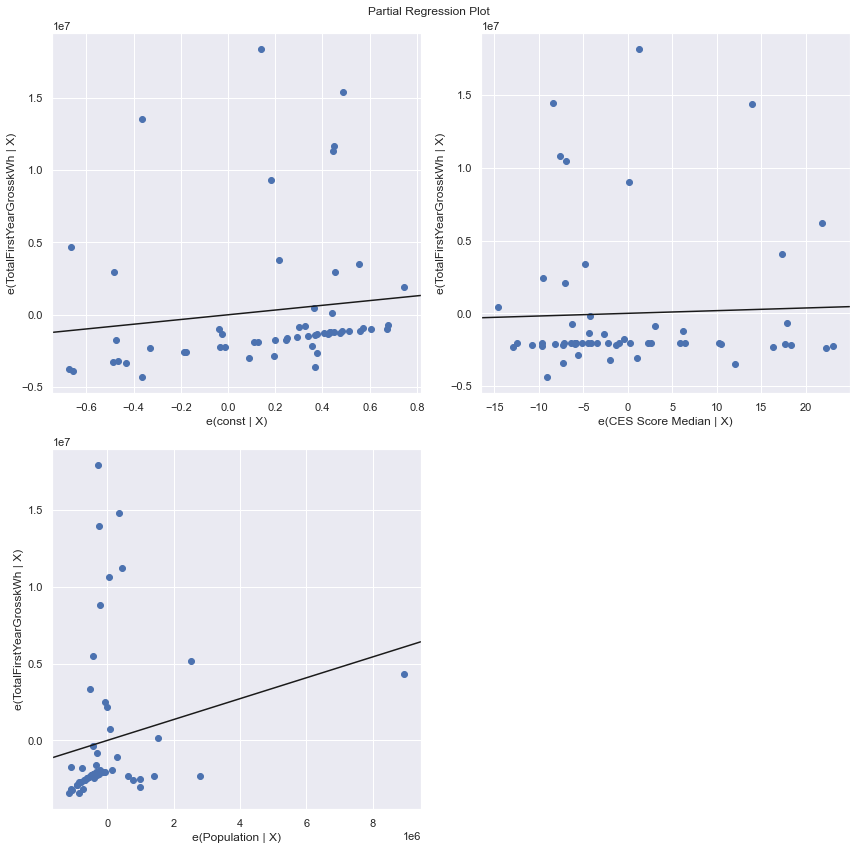

In [25]:
run_a_regression_on(df[['CES Score Median', 'Population']], df['TotalFirstYearGrosskWh'])

Create a name for this regression:  CES, Population, Therm preliminary


Congratulations! The regression results are saved!


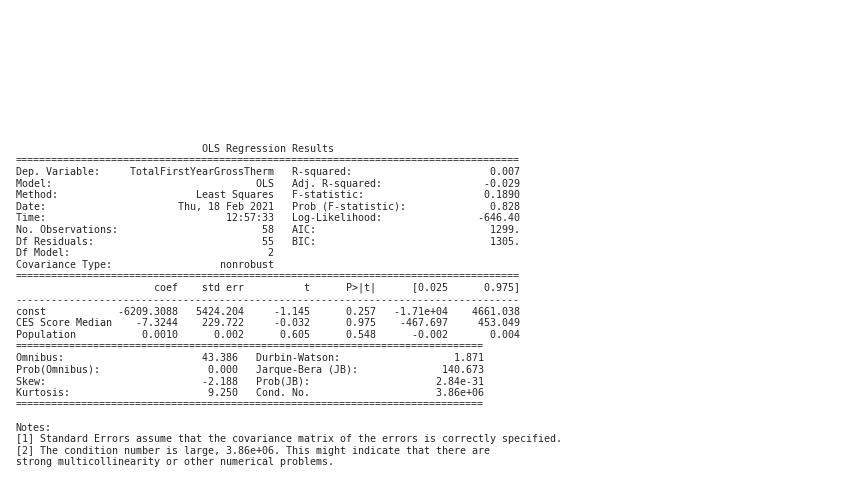

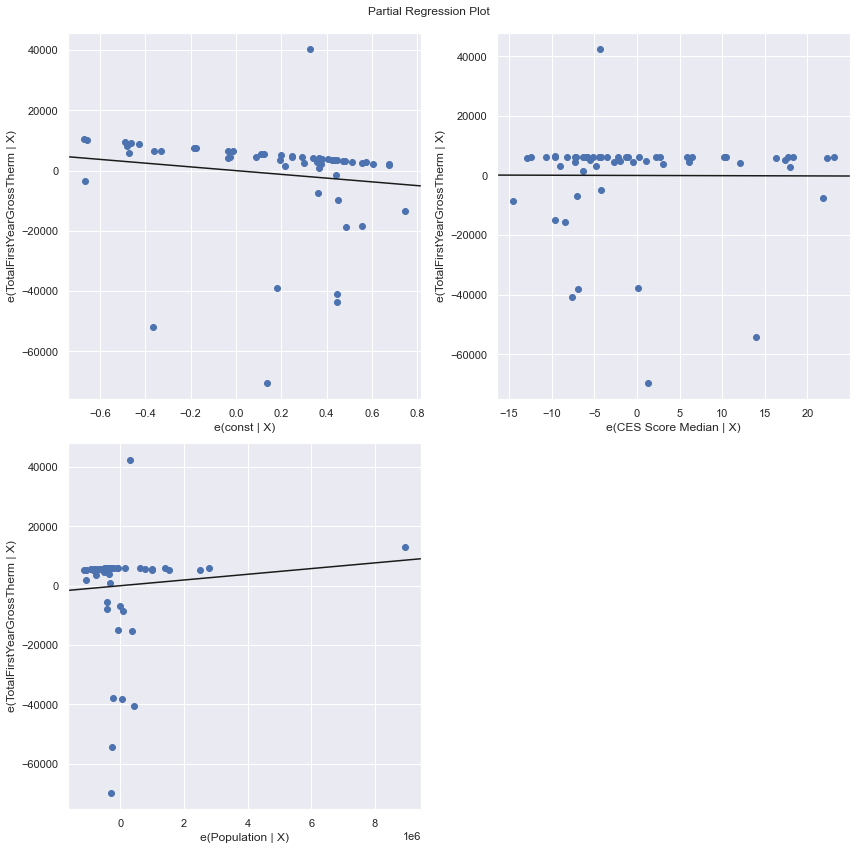

In [26]:
run_a_regression_on(df[['CES Score Median', 'Population']], df['TotalFirstYearGrossTherm'])

# New regression function

In [65]:
def three_regressions(X):

        #creating space to save regressions

        foldername = input('Create a name for this regression: ')
        Path('regressions/' + foldername).mkdir(parents = True, exist_ok = True )

        #actual regression

        X = sm.add_constant(X)
        Bmodel = sm.OLS(df['Budget'],X).fit()
        kWhmodel = sm.OLS(df['TotalFirstYearGrosskWh'], X).fit()
        Thermmodel = sm.OLS(df['TotalFirstYearGrossTherm'], X).fit()
        
        #saving regression summary
        #this is from stackoverflow

        plt.figure(1, figsize=(12, 7))
        plt.text(0.01, 0.05, str(Bmodel.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
        plt.axis('off')
        plt.tight_layout()
        plt.savefig('regressions/' + foldername + '/budget_summary.png') 
        plt.clf()
        
        plt.figure(2, figsize=(12, 7))
        plt.text(0.01, 0.05, str(kWhmodel.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
        plt.axis('off')
        plt.tight_layout()
        plt.savefig('regressions/' + foldername + '/kWh_summary.png')
        plt.clf()
        
        plt.figure(3, figsize=(12, 7))
        plt.text(0.01, 0.05, str(Thermmodel.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
        plt.axis('off')
        plt.tight_layout()
        plt.savefig('regressions/' + foldername + '/Therm_summary.png')
        plt.clf()

        #saving regression plot

        bg = plt.figure(4, figsize=(12, 12))
        sm.graphics.plot_partregress_grid(Bmodel, fig=bg)
        plt.savefig('regressions/' + foldername + '/budget_graph.png')
        plt.clf()
       
        kwhg = plt.figure(5, figsize=(12, 12))
        sm.graphics.plot_partregress_grid(kWhmodel, fig=kwhg)
        plt.savefig('regressions/' + foldername + '/kWh_graph.png')
        plt.clf()
        
        tg = plt.figure(6, figsize=(12, 12))
        sm.graphics.plot_partregress_grid(Thermmodel, fig=tg)
        plt.savefig('regressions/' + foldername + '/Therm_graph.png')
        plt.clf()

        print('Congratulations! The regression results are saved!')
        return


## CES

In [56]:
three_regressions(df['CES Score Median'])

Create a name for this regression:  CES


Congratulations! The regression results are saved!


<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

## CES and Population

In [57]:
three_regressions(df[['CES Score Median', 'Population']])

Create a name for this regression:  CES, Population


Congratulations! The regression results are saved!


<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

## Income

In [58]:
three_regressions(df['Mean Income'])

Create a name for this regression:  Income


Congratulations! The regression results are saved!


<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

## Tax Revenue

In [59]:
three_regressions(df['Tax Revenue (2016-2018)'])

Create a name for this regression:  Tax Revenue


Congratulations! The regression results are saved!


<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

## CES, Population, Income

In [60]:
three_regressions(df[['CES Score Median', 'Population', 'Mean Income']])

Create a name for this regression:  CES, Population, and Income


Congratulations! The regression results are saved!


<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

## Population, Income

In [61]:
three_regressions(df[['Population', 'Mean Income']])

Create a name for this regression:  Population, Income


Congratulations! The regression results are saved!


<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

## IRR

In [70]:
three_regressions(df['IRR'])

Create a name for this regression:  IRR


Congratulations! The regression results are saved!


<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

## CES, Population, Income, IRR

In [71]:
three_regressions(df[['CES Score Median', 'Population', 'Mean Income', 'IRR']])

Create a name for this regression:  CES, Population, Income, IRR


Congratulations! The regression results are saved!


<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

## CES, Population, Income, IRR, Tax Revenue

In [72]:
three_regressions(df[['CES Score Median', 'Population', 'Mean Income', 'IRR', 'Tax Revenue (2016-2018)']])

Create a name for this regression:  all indicators


Congratulations! The regression results are saved!


<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

## IRR and Population

In [74]:
three_regressions(df[['IRR', 'Population']])

Create a name for this regression:  IRR and Population


Congratulations! The regression results are saved!


<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

## IRR and Tax Revenue

In [75]:
three_regressions(df[['IRR', 'Tax Revenue (2016-2018)']])

Create a name for this regression:  IRR and Tax Revenue


Congratulations! The regression results are saved!


<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

## Population

In [76]:
three_regressions(df['Population'])

Create a name for this regression:  Population


Congratulations! The regression results are saved!


<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

In [67]:
def three_regressions_no_constant(X):

        #creating space to save regressions

        foldername = input('Create a name for this regression: ')
        Path('regressions/' + foldername).mkdir(parents = True, exist_ok = True )

        #actual regression

        Bmodel = sm.OLS(df['Budget'],X).fit()
        kWhmodel = sm.OLS(df['TotalFirstYearGrosskWh'], X).fit()
        Thermmodel = sm.OLS(df['TotalFirstYearGrossTherm'], X).fit()
        
        #saving regression summary
        #this is from stackoverflow

        plt.figure(1, figsize=(12, 7))
        plt.text(0.01, 0.05, str(Bmodel.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
        plt.axis('off')
        plt.tight_layout()
        plt.savefig('regressions/' + foldername + '/budget_summary.png') 
        plt.clf()
        
        plt.figure(2, figsize=(12, 7))
        plt.text(0.01, 0.05, str(kWhmodel.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
        plt.axis('off')
        plt.tight_layout()
        plt.savefig('regressions/' + foldername + '/kWh_summary.png')
        plt.clf()
        
        plt.figure(3, figsize=(12, 7))
        plt.text(0.01, 0.05, str(Thermmodel.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
        plt.axis('off')
        plt.tight_layout()
        plt.savefig('regressions/' + foldername + '/Therm_summary.png')
        plt.clf()

        #saving regression plot

#         bg = plt.figure(4, figsize=(12, 12))
#         sm.graphics.plot_partregress_grid(Bmodel, fig=bg)
#         plt.savefig('regressions/' + foldername + '/budget_graph.png')
#         plt.clf()
       
#         kwhg = plt.figure(5, figsize=(12, 12))
#         sm.graphics.plot_partregress_grid(kWhmodel, fig=kwhg)
#         plt.savefig('regressions/' + foldername + '/kWh_graph.png')
#         plt.clf()
        
#         tg = plt.figure(6, figsize=(12, 12))
#         sm.graphics.plot_partregress_grid(Thermmodel, fig=tg)
#         plt.savefig('regressions/' + foldername + '/Therm_graph.png')
#         plt.clf()

        print('Congratulations! The regression results are saved!')
        return


In [68]:
three_regressions_no_constant(df['CES Score Median'])

Create a name for this regression:  CES no constant


Congratulations! The regression results are saved!


<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>

<Figure size 864x504 with 0 Axes>